<h2 align="center">Predict Sales Revenue with scikit-learn</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [5]:
advert = pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [17]:
advert.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [15]:
if 'Unnamed: 0' in advert.columns:
    advert.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
advert.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Task 4: Exploratory Data Analysis

C:\Users\rajni\AppData\Local\Temp\ipykernel_15092\160779166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advert.sales)


<Axes: xlabel='sales', ylabel='Density'>

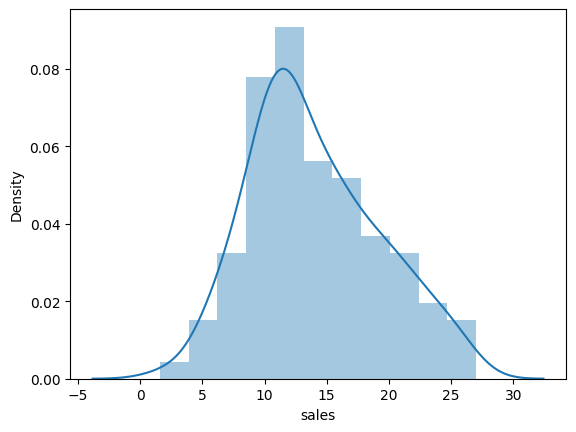

In [18]:
sns.distplot(advert.sales)

C:\Users\rajni\AppData\Local\Temp\ipykernel_15092\2103443747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advert.newspaper)


<Axes: xlabel='newspaper', ylabel='Density'>

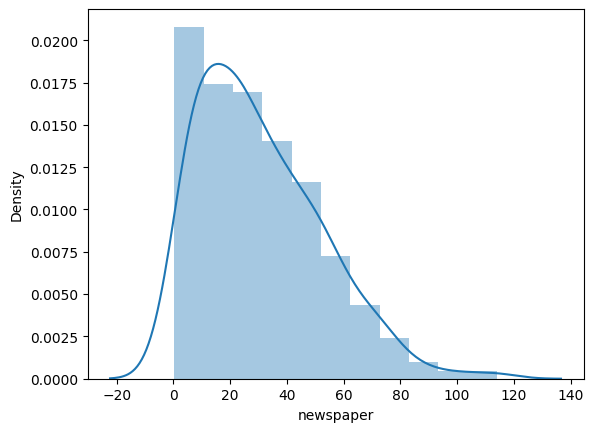

In [19]:
sns.distplot(advert.newspaper)

C:\Users\rajni\AppData\Local\Temp\ipykernel_15092\2166788585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advert.TV)


<Axes: xlabel='TV', ylabel='Density'>

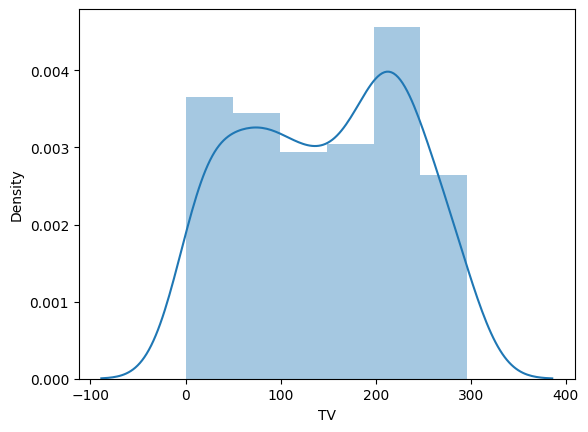

In [20]:
sns.distplot(advert.TV)

C:\Users\rajni\AppData\Local\Temp\ipykernel_15092\1526123264.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advert.radio)


<Axes: xlabel='radio', ylabel='Density'>

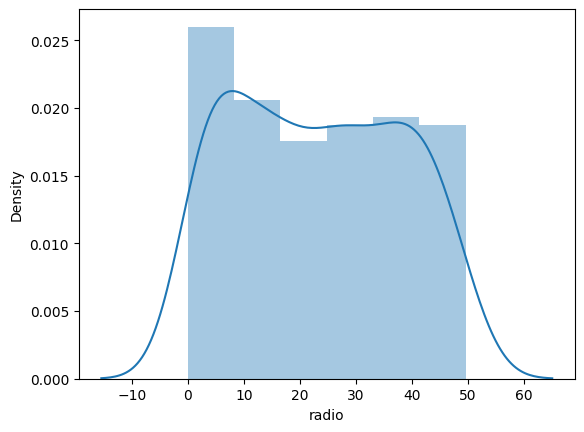

In [21]:
sns.distplot(advert.radio)

### Task 5: Exploring Relationships between Predictors and Response

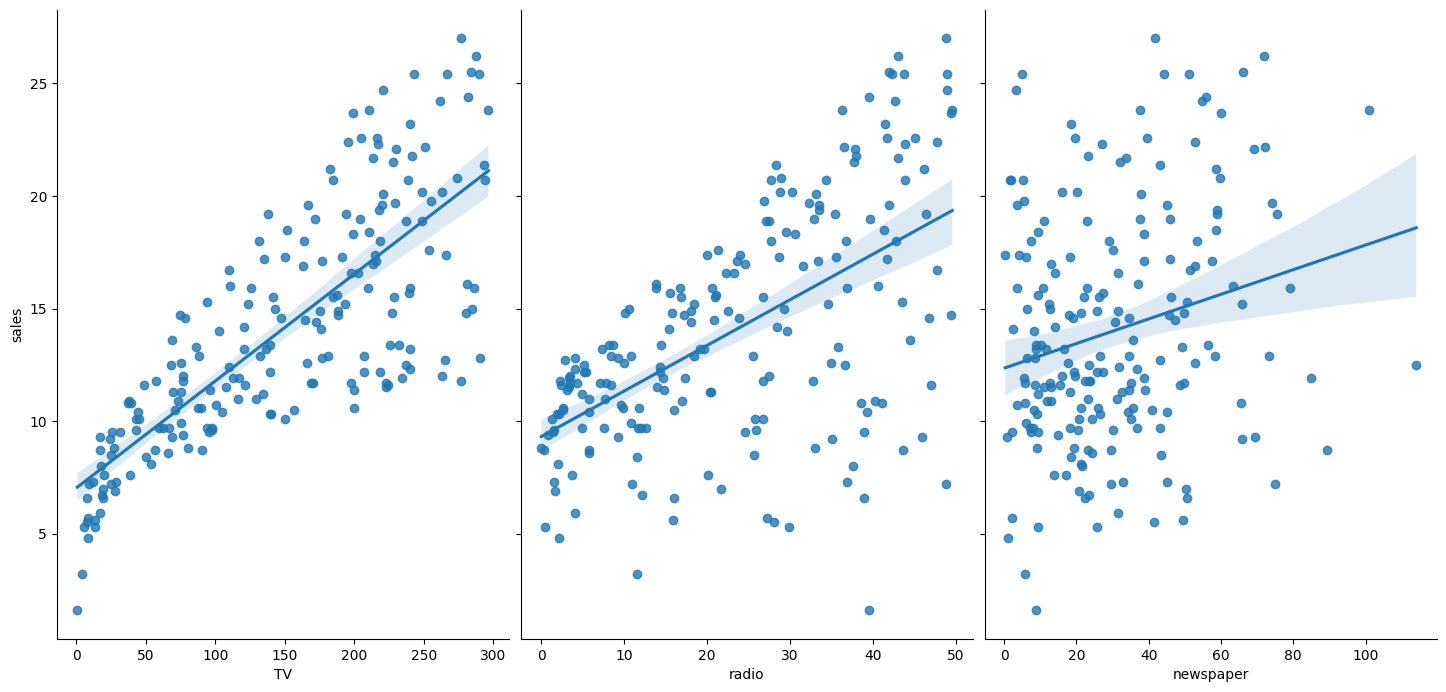

In [25]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7,
             aspect=0.7, kind='reg')


In [27]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [28]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

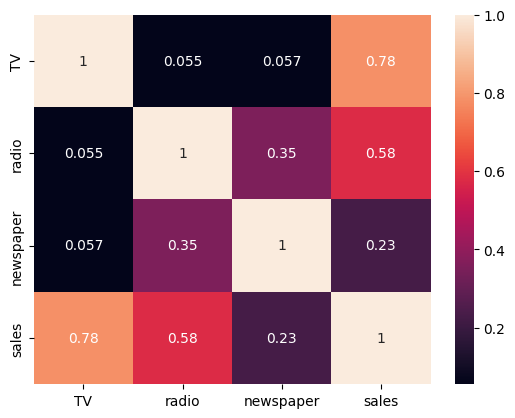

In [29]:
sns.heatmap(advert.corr(),annot = True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [30]:
x = advert[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [31]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [32]:
y = advert[['sales']]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [39]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

### Task 7: Interpreting Model Coefficients

In [41]:
print(linreg.intercept_)
print(linreg.coef_)


[6.91197262]
[[0.04802945]]


### Task 8: Making Predictions with our Model

In [43]:
y_pred = linreg.predict(x_test)
y_pred[:5]

array([[17.03658069],
       [16.63793625],
       [11.50839099],
       [20.36982452],
       [19.10184704]])

### Task 9: Model Evaluation Metrics

In [51]:
true = [100, 50, 30, 20]
pred = [90, 50, 50 ,30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [53]:
print((10+0+20+10)/4)

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [56]:
print((10**2 + 0**2 + 20**2 + 10**2)/4)

print(metrics.mean_squared_error(true,pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [57]:
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589


In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542
